<a href="https://colab.research.google.com/github/Suriya0203/ML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


(891, 15)

In [ ]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)
data_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


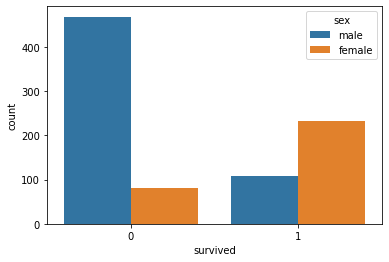

In [ ]:
sns.countplot(x='survived',hue='sex',data=data_2)

In [ ]:
data_2['age'].fillna(method='ffill',inplace=True)
data_2['embarked'].fillna(method='ffill',inplace=True)

In [ ]:
data_2['age'].isnull().sum()
data_2.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
dtype: int64

In [ ]:
sex=pd.get_dummies(data_2['sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embarke=pd.get_dummies(data_2['embarked'],drop_first=True)
embarke.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
plc=pd.get_dummies(data_2['class'],drop_first=True)
plc.head()

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
titanic_data=pd.concat([data_2,sex,embarke,plc],axis=1)
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,male,Q,S,Second,Third
0,0,3,male,22.0,1,0,7.2500,S,Third,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,1,0,1,0,1


In [ ]:
titanic_data.drop(['sex','embarked','class'],axis=1,inplace=True)
titanic_data.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S,Second,Third
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
#titanic_data.drop(['pclass'],axis=1,inplace=True)
titanic_data.head()
cor=titanic_data.corr()
print(cor)


          survived    pclass       age  ...         S    Second     Third
survived  1.000000 -0.338481 -0.065571  ... -0.155660  0.093349 -0.322308
pclass   -0.338481  1.000000 -0.291157  ...  0.081720 -0.188432  0.916673
age      -0.065571 -0.291157  1.000000  ... -0.030168  0.000919 -0.244945
sibsp    -0.035322  0.083081 -0.206104  ...  0.070941 -0.055932  0.092548
parch     0.081629  0.018443 -0.165191  ...  0.063036 -0.000734  0.015790
fare      0.257307 -0.549500  0.083417  ... -0.166603 -0.118557 -0.413333
male     -0.543351  0.131900  0.058415  ...  0.125722 -0.064746  0.137143
Q         0.008660  0.213504  0.027201  ... -0.500146 -0.128586  0.231667
S        -0.155660  0.081720 -0.030168  ...  1.000000  0.192061 -0.009511
Second    0.093349 -0.188432  0.000919  ...  0.192061  1.000000 -0.565210
Third    -0.322308  0.916673 -0.244945  ... -0.009511 -0.565210  1.000000

[11 rows x 11 columns]


In [ ]:

x=titanic_data.drop(['survived'],axis=1)
y=titanic_data['survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
#reg = linear_model.LogisticRegression()
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train, y_train)
#reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predict=logistic.predict(x_test)

confusion_matrix(y_test,predict)

array([[151,  24],
       [ 24,  69]])

In [ ]:
d={"name":["suriya"],"age":[18]}
print(d)
import pandas as pd
df=pd.DataFrame(d)
print(df)

{'name': ['suriya'], 'age': [18]}
     name  age
0  suriya   18
